# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = (11, 7)

In [3]:
geo = pd.read_excel('geo_comment.xlsx')
geo.drop('Unnamed: 0', axis=1, inplace=True)
geo.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [4]:
geo.shape

(70382, 5)

Добавим столько записей каждой строки, сколько указано в столбце multiplier.

In [5]:
geo = geo.loc[geo.index.repeat(geo['multiplier'])].reset_index(drop=True)

In [6]:
# больше этот столбец не нужен
geo.drop('multiplier', axis=1, inplace=True)

In [7]:
geo.shape

(108806, 4)

Нормализуем значения x и y

In [8]:
scaler = StandardScaler()

In [9]:
XY_scaled = scaler.fit_transform(geo[['x', 'y']])

In [10]:
geo[['x', 'y']] = XY_scaled

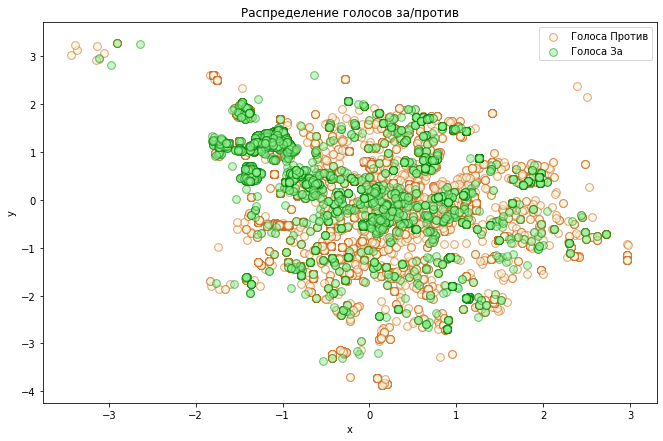

In [11]:
plt.scatter(geo[geo['comment_class'] == -1]['x'], geo[geo['comment_class'] == -1]['y'], c='beige', 
            label='Голоса Против', s=60, alpha = 0.6, edgecolors='chocolate')
plt.scatter(geo[geo['comment_class'] == 1]['x'], geo[geo['comment_class'] == 1]['y'], c='lightgreen', 
            label='Голоса За', s=60, alpha = 0.5, edgecolors='green')
plt.legend()
plt.title('Распределение голосов за/против')
plt.xlabel('x')
plt.ylabel('y');

Подбор оптимального количества кластеров

In [12]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(geo[['x', 'y']], geo['comment_class'])
    k_inertia.append(clf_kmeans.inertia_)

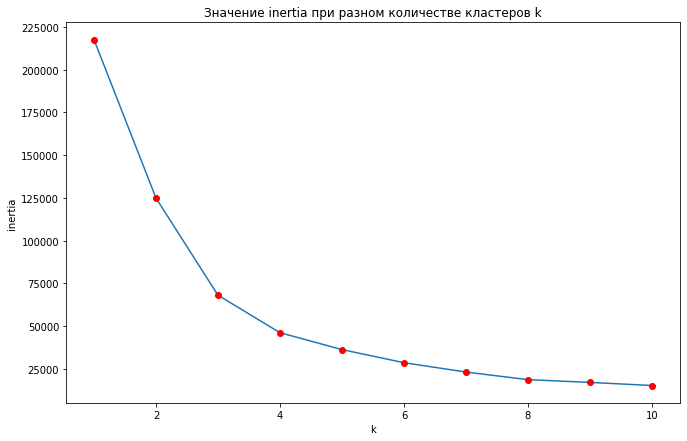

In [13]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.title('Значение inertia при разном количестве кластеров k')
plt.xlabel('k')
plt.ylabel('inertia');

In [14]:
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

8

Проведем кластеризацию с помощью KMeans с 3-мя кластерами

In [15]:
clusters = KMeans(n_clusters=3).fit_predict(geo[['x', 'y']], geo['comment_class'])

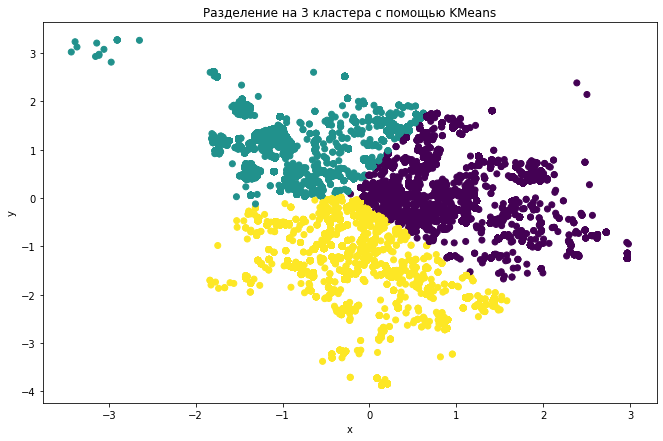

In [16]:
plt.scatter(geo['x'], geo['y'], c=clusters)
plt.title('Разделение на 3 кластера с помощью KMeans')
plt.xlabel('x')
plt.ylabel('y');

In [17]:
clusters = KMeans(n_clusters=5).fit_predict(geo[['x', 'y']], geo['comment_class'])

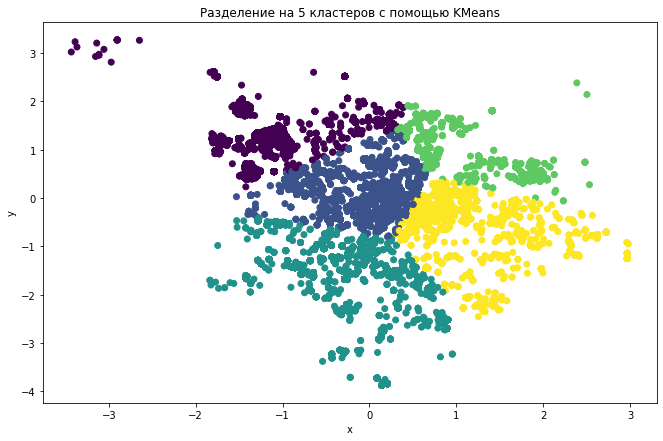

In [18]:
plt.scatter(geo['x'], geo['y'], c=clusters)
plt.title('Разделение на 5 кластеров с помощью KMeans')
plt.xlabel('x')
plt.ylabel('y');

In [64]:
clusters = KMeans(n_clusters=8).fit_predict(geo[['x', 'y']], geo['comment_class']) 

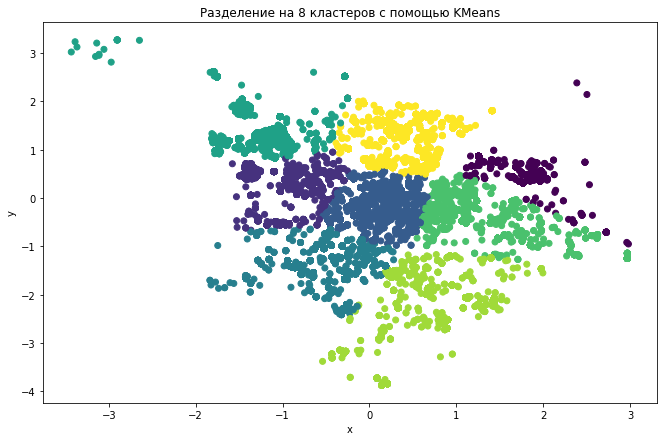

In [65]:
plt.scatter(geo['x'], geo['y'], c=clusters)
plt.title('Разделение на 8 кластеров с помощью KMeans')
plt.xlabel('x')
plt.ylabel('y'); # выглядит наиболее оптимально

Разделение на кластеры с помощью DBSCAN

In [77]:
clusters = DBSCAN(eps=0.25, min_samples=1000, n_jobs=-1).fit_predict(geo[['x', 'y']], geo['comment_class'])

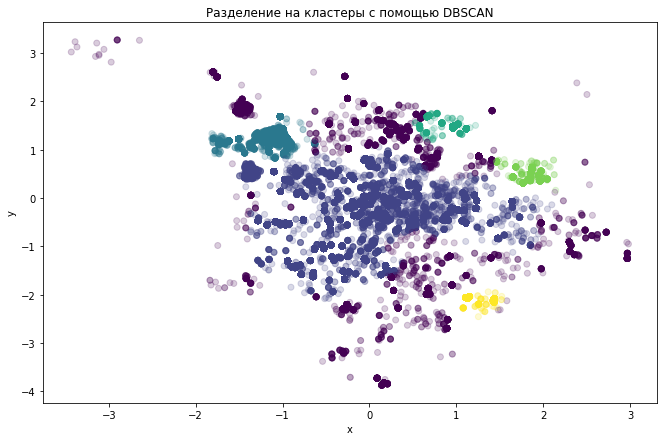

In [78]:
plt.scatter(geo['x'], geo['y'], c=clusters, alpha=0.2)
plt.title('Разделение на кластеры с помощью DBSCAN')
plt.xlabel('x')
plt.ylabel('y');

Кластеризация для голосов За

In [79]:
clusters = KMeans(n_clusters=3).fit_predict(geo[geo['comment_class'] == 1][['x', 'y']], )

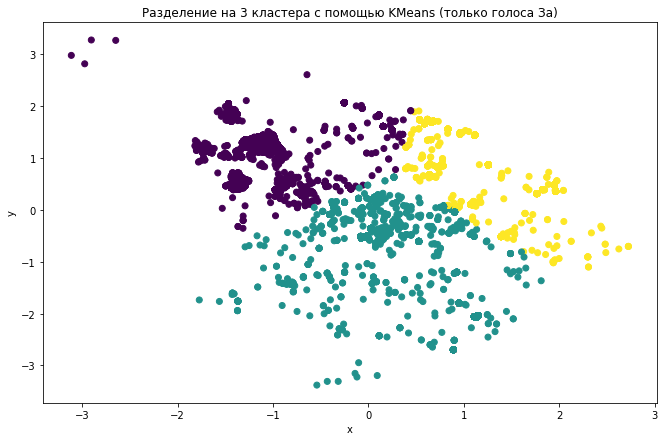

In [80]:
plt.scatter(geo[geo['comment_class'] == 1]['x'], geo[geo['comment_class'] == 1]['y'], c=clusters)
plt.title('Разделение на 3 кластера с помощью KMeans (только голоса За)')
plt.xlabel('x')
plt.ylabel('y');

In [81]:
clusters = KMeans(n_clusters=8).fit_predict(geo[geo['comment_class'] == 1][['x', 'y']], )

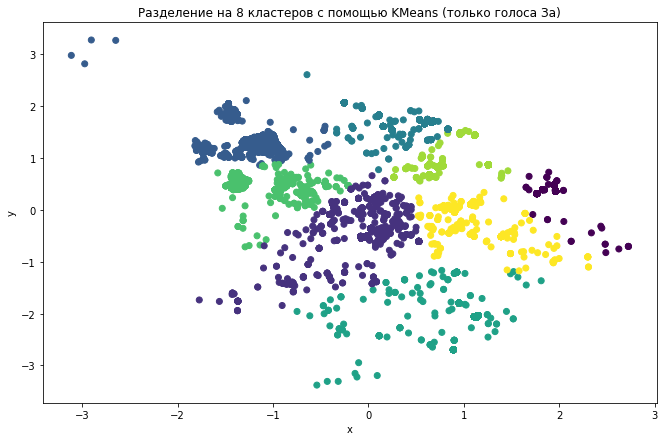

In [82]:
plt.scatter(geo[geo['comment_class'] == 1]['x'], geo[geo['comment_class'] == 1]['y'], c=clusters)
plt.title('Разделение на 8 кластеров с помощью KMeans (только голоса За)')
plt.xlabel('x')
plt.ylabel('y');

In [83]:
clusters = DBSCAN(eps=0.35, min_samples=100).fit_predict(geo[geo['comment_class'] == 1][['x', 'y']], )

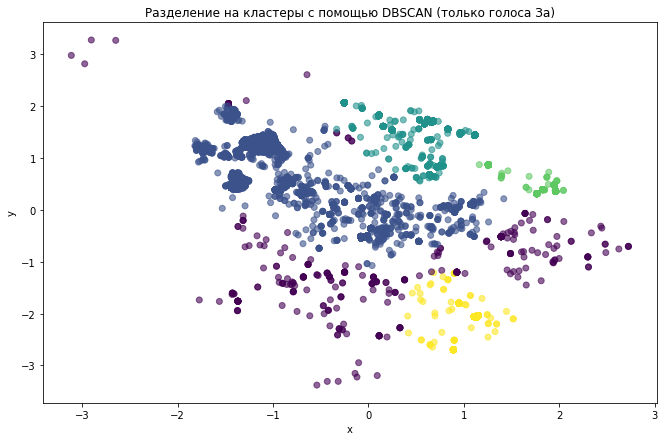

In [84]:
plt.scatter(geo[geo['comment_class'] == 1]['x'], geo[geo['comment_class'] == 1]['y'], c=clusters, alpha=0.6)
plt.title('Разделение на кластеры с помощью DBSCAN (только голоса За)')
plt.xlabel('x')
plt.ylabel('y');

Кластеризация для голосов Против

In [85]:
clusters = KMeans(n_clusters=3).fit_predict(geo[geo['comment_class'] == -1][['x', 'y']], )

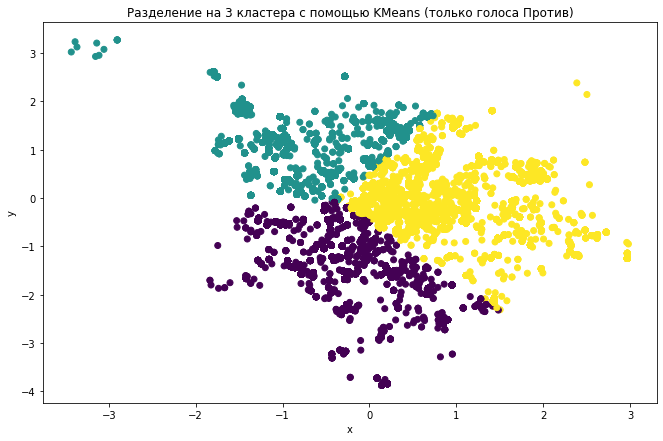

In [86]:
plt.scatter(geo[geo['comment_class'] == -1]['x'], geo[geo['comment_class'] == -1]['y'], c=clusters)
plt.title('Разделение на 3 кластера с помощью KMeans (только голоса Против)')
plt.xlabel('x')
plt.ylabel('y');

In [87]:
clusters = KMeans(n_clusters=8).fit_predict(geo[geo['comment_class'] == -1][['x', 'y']], )

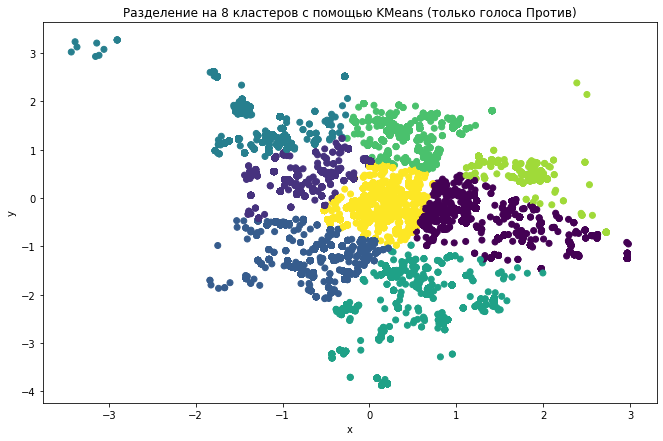

In [88]:
plt.scatter(geo[geo['comment_class'] == -1]['x'], geo[geo['comment_class'] == -1]['y'], c=clusters)
plt.title('Разделение на 8 кластеров с помощью KMeans (только голоса Против)')
plt.xlabel('x')
plt.ylabel('y');

In [89]:
clusters = DBSCAN(eps=0.25, min_samples=1500).fit_predict(geo[geo['comment_class'] == -1][['x', 'y']], )

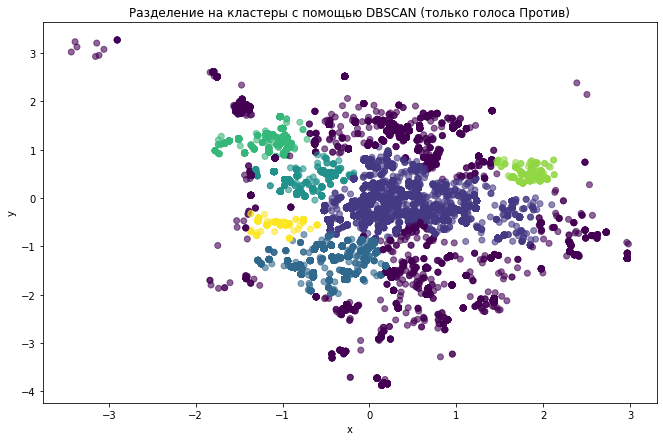

In [90]:
plt.scatter(geo[geo['comment_class'] == -1]['x'], geo[geo['comment_class'] == -1]['y'], c=clusters, alpha=0.6)
plt.title('Разделение на кластеры с помощью DBSCAN (только голоса Против)')
plt.xlabel('x')
plt.ylabel('y');

Наиболее активные в голосовании районы

In [259]:
clusters = DBSCAN(eps=0.25, min_samples=1000).fit_predict(geo[['x', 'y']], geo['comment_class'])

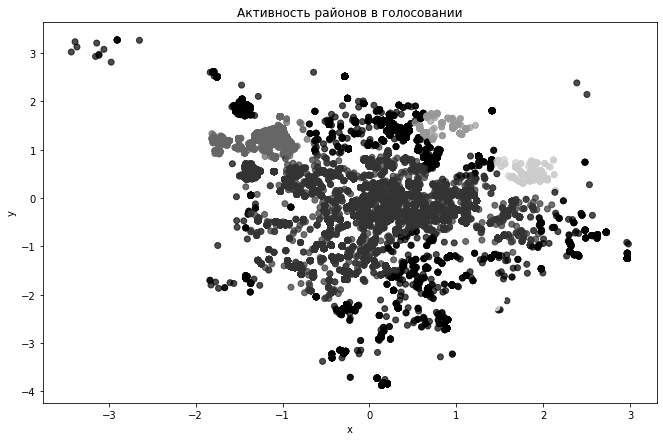

In [263]:
plt.scatter(geo['x'], geo['y'], c=clusters, cmap='gray', alpha=0.7)
plt.title('Активность районов в голосовании')
plt.xlabel('x')
plt.ylabel('y');